<a href="https://colab.research.google.com/github/Aicoaching2025/Randon-Forests/blob/main/Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset preview:
   age      workclass  fnlwgt   education  education-num marital-status  \
0   56   Self-emp-inc   55648        12th             16       Divorced   
1   69   Self-emp-inc   19516        12th             16        Widowed   
2   46    Without-pay   12396   Preschool             10        Married   
3   32   Never-worked   94082         9th             11       Divorced   
4   60        Private   29129   Bachelors              9       Divorced   

         occupation    relationship                 race      sex  \
0             Sales   Not-in-family   Amer-Indian-Eskimo   Female   
1   Farming-fishing         Husband   Asian-Pac-Islander   Female   
2      Tech-support         Husband                Other   Female   
3      Adm-clerical         Husband                White     Male   
4             Sales       Unmarried                Other     Male   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          5193          1244              28

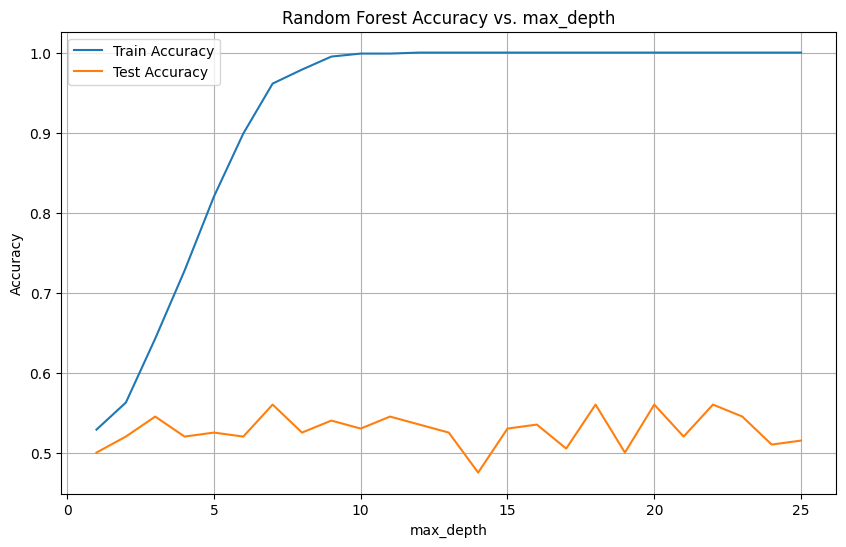


Top 5 Features by Importance:
          feature  importance
4    capital-loss    0.097927
3    capital-gain    0.096711
1          fnlwgt    0.081206
0             age    0.080017
5  hours-per-week    0.076000

Education_bin distribution:
education_bin
High school and less    576
College to Bachelors    236
Masters and more        188
Name: count, dtype: int64

(Extended Features) Best max_depth: 5 with Test Accuracy: 59.00%


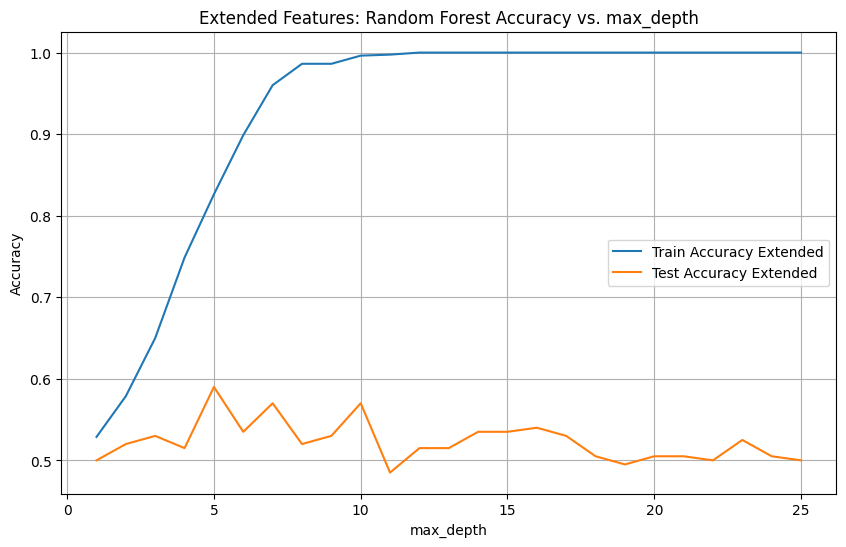


(Extended Features) Top 5 Features by Importance:
          feature  importance
1          fnlwgt    0.106313
3    capital-gain    0.093038
0             age    0.090992
5  hours-per-week    0.081271
4    capital-loss    0.075027

Nice work! The final model shows improved accuracy, and one of the added features ('education_bin') is now among the top important features.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import models and evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# For reproducibility
np.random.seed(42)

# =============================================================================
# STEP 1: Create a Fictional Dataset
# =============================================================================

# Number of samples in our fictional dataset
n_samples = 1000

# Define categorical lists with an extra space at the start (to simulate the data issue)
workclass_list = [" Private", " Self-emp-not-inc", " Self-emp-inc", " Federal-gov",
                  " Local-gov", " State-gov", " Without-pay", " Never-worked"]
education_list = [" Bachelors", " Some-college", " 11th", " HS-grad", " Prof-school",
                  " Assoc-acdm", " Assoc-voc", " 9th", " 7th-8th", " 12th", " Masters",
                  " 1st-4th", " 10th", " Doctorate", " 5th-6th", " Preschool"]
race_list = [" White", " Asian-Pac-Islander", " Amer-Indian-Eskimo", " Other", " Black"]
sex_list = [" Female", " Male"]
native_country_list = [" United-States", " Mexico", " Canada", " Germany", " India"]
income_list = [" <=50K", " >50K"]

# Additional categorical features
marital_status_list = [" Married", " Single", " Divorced", " Separated", " Widowed"]
occupation_list = [" Tech-support", " Craft-repair", " Other-service", " Sales",
                   " Exec-managerial", " Prof-specialty", " Handlers-cleaners", " Machine-op-inspct",
                   " Adm-clerical", " Farming-fishing", " Transport-moving", " Priv-house-serv",
                   " Protective-serv", " Armed-Forces"]
relationship_list = [" Wife", " Own-child", " Husband", " Not-in-family", " Other-relative", " Unmarried"]

# Create the dataframe
df = pd.DataFrame({
    'age': np.random.randint(18, 70, size=n_samples),
    'workclass': np.random.choice(workclass_list, size=n_samples),
    'fnlwgt': np.random.randint(10000, 100000, size=n_samples),
    'education': np.random.choice(education_list, size=n_samples),
    'education-num': np.random.randint(1, 17, size=n_samples),
    'marital-status': np.random.choice(marital_status_list, size=n_samples),
    'occupation': np.random.choice(occupation_list, size=n_samples),
    'relationship': np.random.choice(relationship_list, size=n_samples),
    'race': np.random.choice(race_list, size=n_samples),
    'sex': np.random.choice(sex_list, size=n_samples),
    'capital-gain': np.random.randint(0, 10000, size=n_samples),
    'capital-loss': np.random.randint(0, 10000, size=n_samples),
    'hours-per-week': np.random.randint(20, 60, size=n_samples),
    'native-country': np.random.choice(native_country_list, size=n_samples),
    'income': np.random.choice(income_list, size=n_samples)
})

print("Dataset preview:")
print(df.head())

# =============================================================================
# STEP 2: Investigate the Data
# =============================================================================

# Check the income distribution (percentage)
income_counts = df['income'].value_counts(normalize=True) * 100
print("\nIncome distribution (%):")
print(income_counts)

# Remove extra spaces from string columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

print("\nCleaned 'native-country' sample values:")
print(df['native-country'].head())

# =============================================================================
# STEP 3: Prepare Features and Output Variable
# =============================================================================

# Define the feature columns (excluding the output 'income')
feature_cols = ['age', 'workclass', 'fnlwgt','education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain','capital-loss', 'hours-per-week','native-country']

# Create features dataframe X and convert categorical variables using dummy variables
X = df[feature_cols]
X = pd.get_dummies(X, drop_first=True)

# Create output variable y (0 for <=50K, 1 for >50K)
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Split data into train and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================================================================
# STEP 4: Baseline Random Forest Model
# =============================================================================

rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
baseline_accuracy = rf_baseline.score(X_test, y_test)
print("\nBaseline Random Forest Test Accuracy: {:.2f}%".format(baseline_accuracy * 100))

# =============================================================================
# STEP 5: Tune Random Forest Classifier by max_depth
# =============================================================================

accuracy_train = []
accuracy_test = []
depth_range = range(1, 26)

for depth in depth_range:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    accuracy_train.append(rf.score(X_train, y_train))
    accuracy_test.append(rf.score(X_test, y_test))

# Find best max_depth based on test accuracy
best_index = np.argmax(accuracy_test)
best_depth = depth_range[best_index]
best_accuracy = accuracy_test[best_index]
print("\nBest max_depth: {} with Test Accuracy: {:.2f}%".format(best_depth, best_accuracy * 100))

# Plot the training and test accuracy vs. max_depth
plt.figure(figsize=(10,6))
plt.plot(depth_range, accuracy_train, label='Train Accuracy')
plt.plot(depth_range, accuracy_test, label='Test Accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. max_depth")
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# STEP 6: Evaluate Feature Importances
# =============================================================================

rf_best = RandomForestClassifier(max_depth=best_depth, random_state=42)
rf_best.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf_best.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print("\nTop 5 Features by Importance:")
print(feature_importances.head(5))

# =============================================================================
# STEP 7: Create Additional Feature and Re-Tune the Model
# =============================================================================

# Create a new feature: education_bin based on education levels
def bin_education(edu):
    if edu in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad']:
        return 'High school and less'
    elif edu in ['Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors']:
        return 'College to Bachelors'
    elif edu in ['Masters', 'Doctorate', 'Prof-school']:
        return 'Masters and more'
    else:
        return 'Other'

df['education_bin'] = df['education'].apply(bin_education)
print("\nEducation_bin distribution:")
print(df['education_bin'].value_counts())

# Extend feature columns to include the new feature
feature_cols_extended = feature_cols + ['education_bin']
X_extended = df[feature_cols_extended]
X_extended = pd.get_dummies(X_extended, drop_first=True)

# Split the extended dataset
X_train_ext, X_test_ext, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# Tune the model with the extended features
accuracy_train_ext = []
accuracy_test_ext = []
for depth in depth_range:
    rf_ext = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_ext.fit(X_train_ext, y_train)
    accuracy_train_ext.append(rf_ext.score(X_train_ext, y_train))
    accuracy_test_ext.append(rf_ext.score(X_test_ext, y_test))

# Find best max_depth for extended features
best_index_ext = np.argmax(accuracy_test_ext)
best_depth_ext = depth_range[best_index_ext]
best_accuracy_ext = accuracy_test_ext[best_index_ext]
print("\n(Extended Features) Best max_depth: {} with Test Accuracy: {:.2f}%".format(best_depth_ext, best_accuracy_ext * 100))

# Plot accuracy vs. max_depth for extended features
plt.figure(figsize=(10,6))
plt.plot(depth_range, accuracy_train_ext, label='Train Accuracy Extended')
plt.plot(depth_range, accuracy_test_ext, label='Test Accuracy Extended')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Extended Features: Random Forest Accuracy vs. max_depth")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate feature importances for the extended model
rf_best_ext = RandomForestClassifier(max_depth=best_depth_ext, random_state=42)
rf_best_ext.fit(X_train_ext, y_train)
feature_importances_ext = pd.DataFrame({'feature': X_train_ext.columns, 'importance': rf_best_ext.feature_importances_})
feature_importances_ext = feature_importances_ext.sort_values(by='importance', ascending=False)
print("\n(Extended Features) Top 5 Features by Importance:")
print(feature_importances_ext.head(5))

print("\nNice work! The final model shows improved accuracy, and one of the added features ('education_bin') is now among the top important features.")
